<a href="https://colab.research.google.com/github/Ramyaanbazhagan/Ramyaanbazhagan/blob/main/ReasonBot_An_Explainable_RDF_Based_Multi_Hop_Reasoning_System_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🤖 Hello! I’m ReasonBot — Ask me questions about science, AI, or the universe!
💬 Type your question (or type 'exit' to quit):

👩‍💻 You: Is Socrates a Mortal?


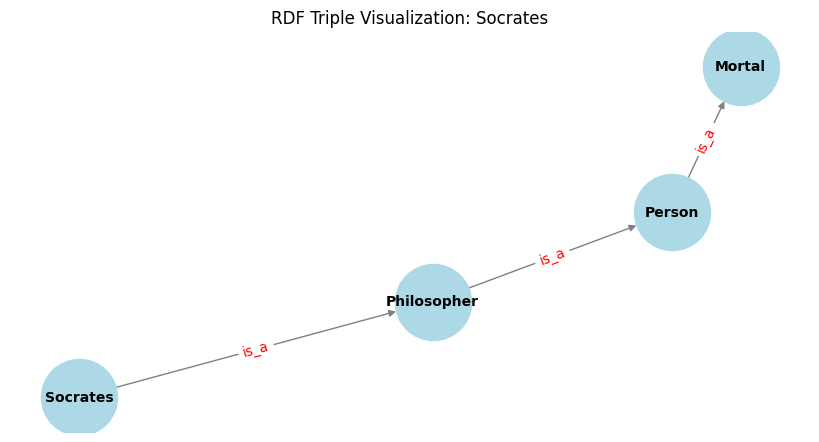

🤖 ReasonBot: ✅ Yes — because Socrates → Philosopher → Person → Mortal

🗣️ Socrates is a philosopher which is a kind of person → mortal — and all mortals are mortal.



In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, deque

# ✅ STEP 1: KNOWLEDGE BASE
knowledge_base = [
    ("Socrates", "is_a", "Man"),
    ("Plato", "is_a", "Philosopher"),
    ("Aristotle", "is_a", "Philosopher"),
    ("Socrates", "is_a", "Philosopher"),
    ("Einstein", "is_a", "Scientist"),
    ("Newton", "is_a", "Scientist"),
    ("Marie Curie", "is_a", "Scientist"),
    ("Ada Lovelace", "is_a", "Mathematician"),
    ("Turing", "is_a", "ComputerScientist"),
    ("Scientist", "is_a", "Person"),
    ("Philosopher", "is_a", "Person"),
    ("Mathematician", "is_a", "Scientist"),
    ("ComputerScientist", "is_a", "Scientist"),
    ("Person", "is_a", "Mortal"),

    ("Einstein", "discovered", "TheoryOfRelativity"),
    ("Newton", "discovered", "Gravity"),
    ("Marie Curie", "discovered", "Radioactivity"),
    ("Darwin", "proposed", "TheoryOfEvolution"),
    ("TheoryOfRelativity", "is_a", "ScientificTheory"),
    ("Gravity", "is_a", "Force"),
    ("Radioactivity", "is_a", "Phenomenon"),
    ("TheoryOfEvolution", "is_a", "ScientificTheory"),

    ("Earth", "is_a", "Planet"),
    ("Mars", "is_a", "Planet"),
    ("Sun", "is_a", "Star"),
    ("Moon", "orbits", "Earth"),
    ("Earth", "orbits", "Sun"),
    ("Mars", "orbits", "Sun"),
    ("Jupiter", "is_a", "GasGiant"),
    ("Jupiter", "is_a", "Planet"),
    ("Planet", "orbits", "Star"),

    ("India", "is_a", "Country"),
    ("Germany", "is_a", "Country"),
    ("Brazil", "is_a", "Country"),
    ("India", "located_in", "Asia"),
    ("Germany", "located_in", "Europe"),
    ("Brazil", "located_in", "SouthAmerica"),
    ("Asia", "is_a", "Continent"),
    ("Europe", "is_a", "Continent"),
    ("SouthAmerica", "is_a", "Continent"),

    ("Dog", "is_a", "Mammal"),
    ("Cat", "is_a", "Mammal"),
    ("Elephant", "is_a", "Mammal"),
    ("Whale", "is_a", "Mammal"),
    ("Eagle", "is_a", "Bird"),
    ("Penguin", "is_a", "Bird"),
    ("Bird", "is_a", "Animal"),
    ("Mammal", "is_a", "Animal"),
    ("Animal", "is_a", "LivingBeing"),

    ("Neuron", "is_a", "Cell"),
    ("Cell", "is_a", "BiologicalUnit"),
    ("BiologicalUnit", "is_a", "LivingBeing"),
    ("DNA", "found_in", "Cell"),
    ("Nucleus", "part_of", "Cell"),
    ("Heart", "is_a", "Organ"),
    ("Organ", "is_a", "BiologicalUnit"),

    ("AI", "is_a", "Technology"),
    ("Technology", "is_a", "Software"),
    ("MachineLearning", "is_a", "AI"),
    ("DeepLearning", "is_a", "MachineLearning"),
    ("NeuralNetworks", "is_a", "DeepLearning"),
    ("Chatbot", "is_a", "AIApplication"),
    ("AIApplication", "is_a", "Software"),
    ("Software", "is_a", "Tool"),
    ("Python", "is_a", "ProgrammingLanguage"),
    ("Java", "is_a", "ProgrammingLanguage"),
    ("ProgrammingLanguage", "is_a", "Tool"),

    ("Electron", "is_a", "SubatomicParticle"),
    ("Proton", "is_a", "SubatomicParticle"),
    ("Neutron", "is_a", "SubatomicParticle"),
    ("SubatomicParticle", "is_a", "Matter"),
    ("Atom", "is_a", "Matter"),
    ("Water", "is_a", "Compound"),
    ("H2O", "is_a", "ChemicalFormula"),
    ("Water", "has_formula", "H2O"),

    ("Apple", "is_a", "Fruit"),
    ("Banana", "is_a", "Fruit"),
    ("Fruit", "is_a", "Food"),
    ("Food", "is_a", "Material"),
    ("Material", "is_a", "Matter"),

    ("Mathematics", "is_a", "Discipline"),
    ("Physics", "is_a", "Discipline"),
    ("Discipline", "is_a", "FieldOfStudy"),
    ("FieldOfStudy", "is_a", "KnowledgeDomain"),
    ("Philosophy", "is_a", "Discipline"),

    ("NASA", "is_a", "Organization"),
    ("ISRO", "is_a", "Organization"),
    ("MIT", "is_a", "University"),
    ("IIT", "is_a", "University"),
    ("University", "is_a", "Institution"),
    ("Institution", "is_a", "Organization"),
]

# ✅ STEP 2: BUILD INHERITANCE GRAPH

def build_graph(kb):
    inheritance_graph = defaultdict(list)
    predicate_graph = defaultdict(list)
    for s, p, o in kb:
        if p == "is_a":
            inheritance_graph[s.lower()].append(o.lower())
        predicate_graph[p.lower()].append((s, o))
    return inheritance_graph, predicate_graph

# ✅ STEP 3: MULTI-HOP REASONING TRACE

def reachable_types_with_trace(subject, graph):
    visited = set()
    queue = deque([(subject.lower(), [subject.capitalize()])])
    traces = {}

    while queue:
        current, path = queue.popleft()
        visited.add(current)
        for neighbor in graph.get(current, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor.capitalize()]))
                traces[neighbor] = path + [neighbor.capitalize()]
    return traces

# ✅ STEP 4: VISUALIZATION

def visualize_rdf_path(path):
    G = nx.DiGraph()
    for i in range(len(path) - 1):
        G.add_edge(path[i], path[i+1], label="is_a")

    plt.figure(figsize=(8, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10, font_weight="bold")
    edge_labels = {(path[i], path[i+1]): "is_a" for i in range(len(path) - 1)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)
    plt.title(f"RDF Triple Visualization: {path[0]}")
    plt.show()

# ✅ STEP 5: QUERY ENGINE

def answer_query(query, kb):
    query = query.strip().lower().replace("?", "")
    words = query.split()

    inheritance_graph, predicate_graph = build_graph(kb)

    # ✅ Type checking: "Is X a Y?"
    if len(words) >= 3 and words[0] == "is" and words[2] == "a":
        subject = words[1].capitalize()
        obj = words[-1].capitalize()
        traces = reachable_types_with_trace(subject, inheritance_graph)

        if obj.lower() in traces:
            path = traces[obj.lower()]
            pretty_path = " → ".join(path)
            explanation = f"{path[0]} is a {path[1].lower()} which is a kind of {' → '.join(path[2:]).lower()} — and all {path[-1].lower()}s are {path[-1].lower()}."
            visualize_rdf_path(path)
            return f"✅ Yes — because {pretty_path}\n\n🗣️ {explanation}"
        else:
            return f"❌ No — {subject} is not a {obj}, or not enough information."

    # ✅ Who discovered/proposed/launched X?
    elif words[0] == "who":
        action = words[1]
        target = words[-1].capitalize()
        matches = [s for s, o in predicate_graph[action] if o.lower() == target.lower()]
        if matches:
            return f"🧠 {target} was {action} by: {', '.join(matches)}"
        else:
            return f"❌ I couldn't find who {action} {target}."

    # ✅ What does X [predicate]?
    elif words[0] == "what" and words[1] == "does":
        subject = words[2].capitalize()
        predicate = words[3]
        results = [o for s, o in predicate_graph[predicate] if s.lower() == subject.lower()]
        if results:
            return f"🛠️ {subject} {predicate}s: {', '.join(results)}"
        else:
            return f"❌ I couldn't find what {subject} {predicate}s."

    return "❌ Sorry, I couldn't understand your question."

# ✅ STEP 6: MAIN LOOP — MULTIPLE QUESTION SUPPORT

def ask_questions():
    print("\n🤖 Hello! I’m ReasonBot — Ask me questions about science, AI, or the universe!")
    print("💬 Type your question (or type 'exit' to quit):\n")
    while True:
        user_input = input("👩\u200d💻 You: ")
        if user_input.lower() == 'exit':
            print("🤖 ReasonBot: Goodbye! Have a curious day! 👋")
            break
        response = answer_query(user_input, knowledge_base)
        print("🤖 ReasonBot:", response + "\n")

# ✅ RUN
ask_questions()
